In [ ]:
from google.colab import files 
  
  
uploaded = files.upload()

Saving sampleSubmission.csv to sampleSubmission.csv


In [ ]:
import pandas as pd 
import io 
  
df = pd.read_csv(io.BytesIO(uploaded['sampleSubmission.csv'])) 
df.head()

,id,label
0,1,cat
1,2,cat
2,3,cat
3,4,cat
4,5,cat


In [ ]:
!pip install tensorflow-gpu==2.0.0-rc0

     |████████████████████████████████| 380.5MB 31kB/s 
     |████████████████████████████████| 51kB 2.2MB/s 
     |████████████████████████████████| 501kB 19.5MB/s 
     |████████████████████████████████| 4.3MB 30.7MB/s 


In [ ]:
!pip install mlxtend==0.17.0

     |████████████████████████████████| 1.3MB 5.2MB/s 
  Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [ ]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPool2D,Dropout



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
print(tf.__version__)

2.0.0-rc0


In [ ]:
from tensorflow.keras.datasets import cifar10

In [ ]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
class_names1=['airpalne','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
x_train=x_train/255
x_test=x_test/255

In [ ]:
x_train.shape

(50000, 32, 32, 3)

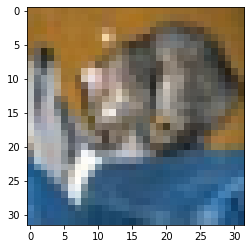

In [ ]:
plt.imshow(x_test[0])

In [ ]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

Build CNN Model

In [ ]:
model=Sequential()

In [ ]:
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',input_shape=[32,32,3]))

model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Dropout(0.5))


model.add(Flatten())
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1048704   
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])


In [ ]:
history=model.fit(x_train,y_train,batch_size=10,epochs=10,verbose=1,validation_data=(x_test,y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 233s 5ms/sample - loss: 0.0036 - sparse_categorical_accuracy: 0.1000 - val_loss: 502.9406 - val_sparse_categorical_accuracy: 0.1000
Epoch 2/10
50000/50000 [==============================] - 235s 5ms/sample - loss: 0.0000e+00 - sparse_categorical_accuracy: 0.1000 - val_loss: 502.9406 - val_sparse_categorical_accuracy: 0.1000
Epoch 3/10
50000/50000 [==============================] - 237s 5ms/sample - loss: 0.0000e+00 - sparse_categorical_accuracy: 0.1000 - val_loss: 502.9406 - val_sparse_categorical_accuracy: 0.1000
Epoch 4/10
50000/50000 [==============================] - 237s 5ms/sample - loss: 0.0000e+00 - sparse_categorical_accuracy: 0.1000 - val_loss: 502.9406 - val_sparse_categorical_accuracy: 0.1000
Epoch 5/10
50000/50000 [==============================] - 240s 5ms/sample - loss: 0.0000e+00 - sparse_categorical_accuracy: 0.1000 - val_loss: 502.9406 - val_sparse_categorical_a

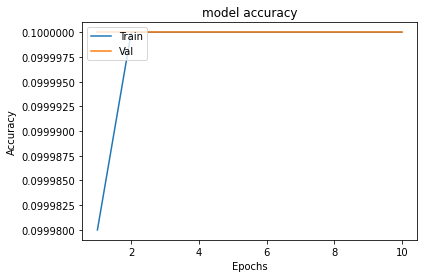

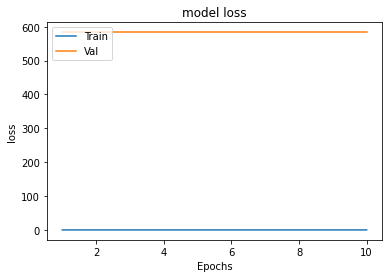

In [ ]:
##plot the training and Validation accuracy values
epoch_range= range(1,11)
plt.plot(epoch_range,history.history['sparse_categorical_accuracy'])
plt.plot(epoch_range,history.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Val'],loc='upper left')
plt.show()

plt.plot(epoch_range,history.history['loss'])
plt.plot(epoch_range,history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend(['Train','Val'],loc='upper left')
plt.show()


In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics  import confusion_matrix

In [ ]:
y_pred=model.predict_classes(x_test)


In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [ ]:
mat=confusion_matrix(y_test,y_pred)
mat

array([[1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0]])

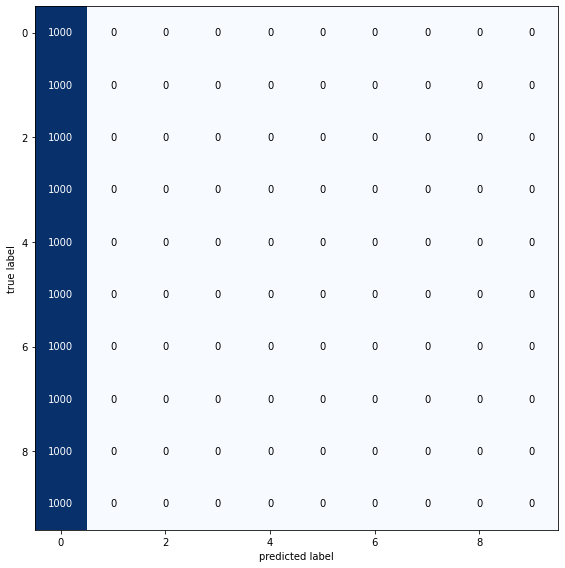

In [ ]:
fig,ax=plot_confusion_matrix(conf_mat=mat,figsize=(8,8), show_normed=False)
plt.tight_layout()